# 调用训练好的 StyleGAN V2 模型生成草莓图像

> 作者：[同济子豪兄](https://space.bilibili.com/1900783)、杨逸飞 2022-4-10

## 进入MMGeneration主目录

In [1]:
import os
os.chdir('mmgeneration')

## 仿照B1代码教程，使用命令行方式调用，生成图像

In [4]:
# 训练得到的最新模型
!python demo/unconditional_demo.py \
        configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
        work_dirs/experiments/stylegan2_strawberry/ckpt/stylegan2_strawberry/latest.pth \
        --num-samples 66 \
        --save-path outputs/C2/strawberry_1.jpg \
        --device cuda:0

load checkpoint from local path: work_dirs/experiments/stylegan2_strawberry/ckpt/stylegan2_strawberry/latest.pth
2022-05-08 21:51:00,652 - mmgen - INFO - Switch to evaluation style mode: single
2022-05-08 21:51:00,653 - mmgen - INFO - Switch to evaluation style mode: single


In [2]:
# 子豪兄训练得到的草莓图像生成模型
!python demo/unconditional_demo.py \
        configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
        https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth \
        --num-samples 66 \
        --save-path outputs/C2/strawberry_2.jpg \
        --device cuda:0

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth
Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth" to /home/featurize/.cache/torch/hub/checkpoints/strawberry_iter_2500.pth
100%|████████████████████████████████████████| 790M/790M [00:16<00:00, 51.2MB/s]
2022-05-08 21:48:20,394 - mmgen - INFO - Switch to evaluation style mode: single
2022-05-08 21:48:20,395 - mmgen - INFO - Switch to evaluation style mode: single


In [3]:
# 子豪兄训练得到的西瓜图像生成模型
!python demo/unconditional_demo.py \
        configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
        https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/watermelon_iter_1500.pth \
        --num-samples 66 \
        --save-path outputs/C2/watermelon.jpg \
        --device cuda:0

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/watermelon_iter_1500.pth
Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/watermelon_iter_1500.pth" to /home/featurize/.cache/torch/hub/checkpoints/watermelon_iter_1500.pth
100%|████████████████████████████████████████| 790M/790M [00:28<00:00, 28.8MB/s]
The model and loaded state dict do not match exactly

missing keys in source state_dict: discriminator.ada_aug.log_buffer, discriminator.ada_aug.aug_pipeline.p, discriminator.ada_aug.aug_pipeline.Hz_geom, discriminator.ada_aug.aug_pipeline.Hz_fbank

2022-05-08 21:49:03,762 - mmgen - INFO - Switch to evaluation style mode: single
2022-05-08 21:49:03,763 - mmgen - INFO - Switch to evaluation style mode: single


## 仿照B1代码教程，生成图像插值视频

In [5]:
# 草莓
!python apps/interpolate_sample.py \
        configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py \
        https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth \
        --export-video \
        --samples-path outputs/C2 \
        --interval 150 \
        --endpoint 7 \
        --space w \
        --sample-cfg randomize_noise=False

set random seed to 2021
load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth
2022-05-08 21:51:38,448 - mmgen - INFO - Sampling model: ema
2022-05-08 21:51:38,448 - mmgen - INFO - Show mode: sequence
2022-05-08 21:51:38,448 - mmgen - INFO - Samples path: outputs/C2
2022-05-08 21:51:38,448 - mmgen - INFO - Switch to evaluation style mode: single


## 仿照B1代码教程，使用Python API 方式调用

### 导入工具包

In [6]:
# 导入mmcv和mmgeneration
import mmcv
from mmgen.apis import init_model, sample_unconditional_model

# 导入numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 载入训练好的 StyleGAN V2 模型

注意，`config_file`和`checkpoint_file`需要对应。

In [7]:
# 教堂图像生成模型
# 指定config文件路径
config_file = 'configs/styleganv2/stylegan2_c2_ffhq_256_b4x8_800k_strawberry.py'

# 指定预训练模型权重文件路径
checkpoint_file = 'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth'
# checkpoint_file = 'work_dirs/experiments/stylegan2_c2_ffhq_256_b4x8_800k/ckpt/stylegan2_c2_ffhq_256_b4x8_800k/latest.pth'

# 输出图像宽高像素尺寸
img_size = 256

# 初始化generatvie
model = init_model(config_file, checkpoint_file, device='cuda:0')

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/strawberry_iter_2500.pth


2022-05-08 21:52:32,199 - mmgen - INFO - Switch to evaluation style mode: single
2022-05-08 21:52:32,202 - mmgen - INFO - Switch to evaluation style mode: single


### 生成若干张草莓图像

In [8]:
# 生成 n的平方 张图像
n = 8

# 生成图像
fake_imgs = sample_unconditional_model(model, n*n)

In [9]:
fake_imgs.shape

torch.Size([64, 3, 256, 256])

展示单张生成的图像

In [10]:
# 将torch张量转为numpy的array
fake_imgs = fake_imgs.numpy()

In [11]:
fake_imgs.shape

(64, 3, 256, 256)

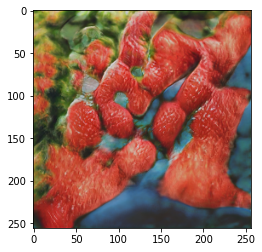

In [12]:
# 选择要展示的图片索引号
index = 7

# 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
RGB = np.zeros((img_size, img_size, 3))
RGB[:,:,0] = fake_imgs[index][2]
RGB[:,:,1] = fake_imgs[index][1]
RGB[:,:,2] = fake_imgs[index][0]

RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
RGB = RGB.astype('uint8')
plt.imshow(RGB)
plt.show()

### n行n列展示生成的图像

In [13]:
def show_fake_img(index):
    '''输入索引号，展示对应的图像'''

    # 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
    RGB = np.zeros((img_size,img_size,3))
    RGB[:,:,0] = fake_imgs[index][2]
    RGB[:,:,1] = fake_imgs[index][1]
    RGB[:,:,2] = fake_imgs[index][0]

    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    RGB = RGB.astype('uint8')
    return RGB
#     plt.imshow(RGB)
#     plt.show()

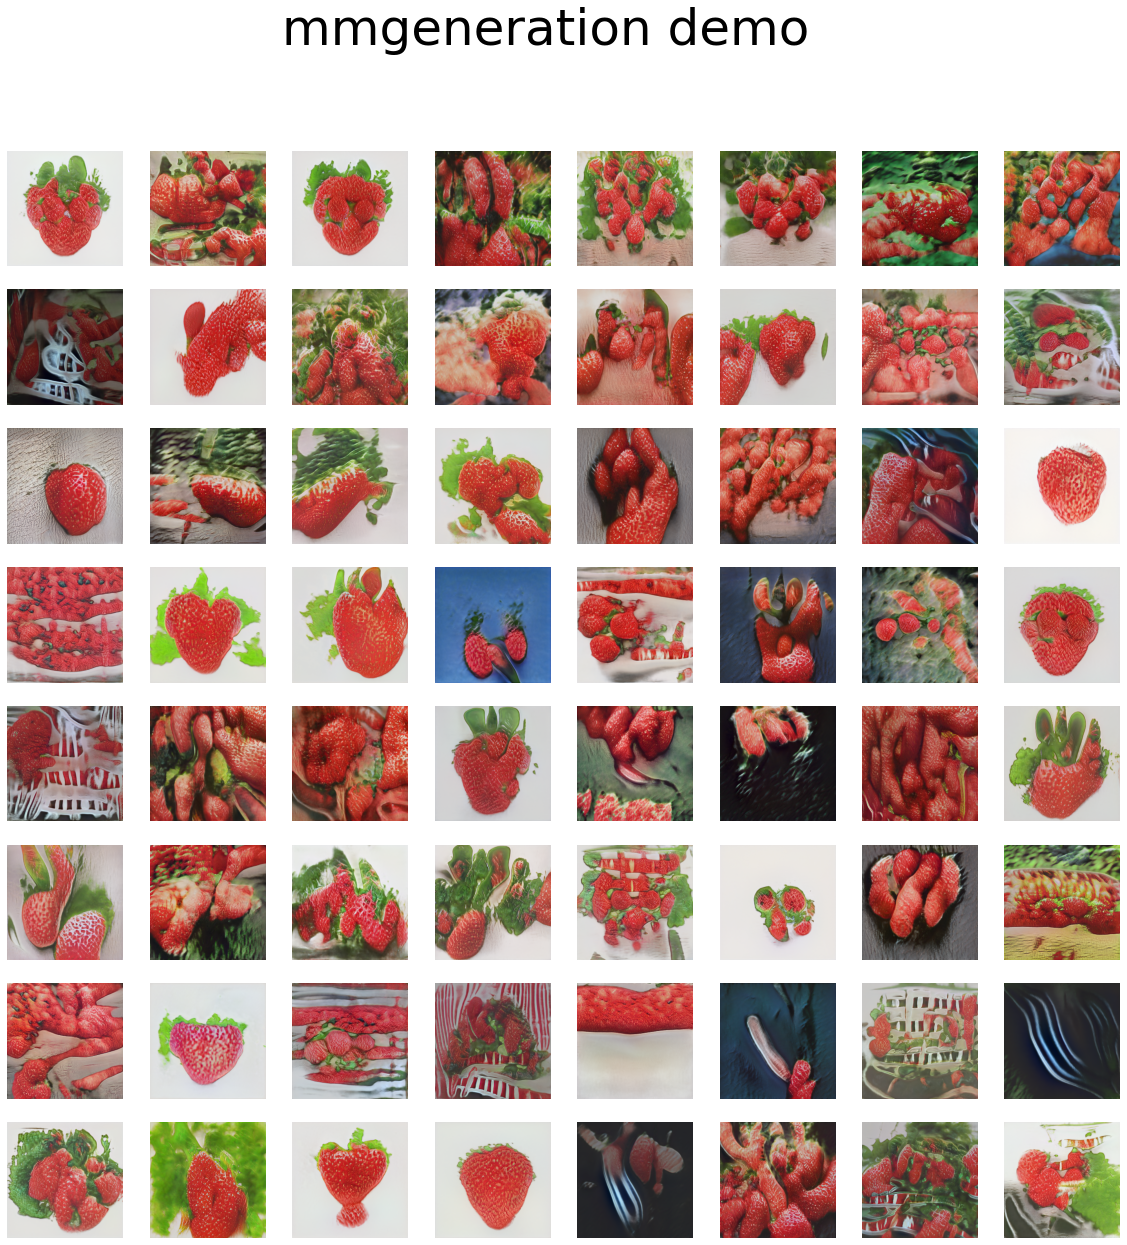

In [14]:
fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(20,20))
for i in range(n*n):
    axes[i//n, i%n].imshow(show_fake_img(i))
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('mmgeneration demo',fontsize=50)
plt.show()